Importamos las librerias a utilizar

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Importamos los DataFrame y los guardamos en una variable con su respectivo nombre

In [26]:
df_train = pd.read_parquet("train.parquet")
df_test = pd.read_parquet("test.parquet")

Visualizamos lo que contiene cada uno

In [27]:
df_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [29]:
df_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,apartment,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,apartment,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


Creamos una columna llamada "category_price" donde los precios que van desde 0 a 999 tiene el valor 1 y los precios que van desde 1000 en adelante tiene el valor 0

In [30]:
df_train["category_price"] = df_train["price"].apply(lambda x: 1 if x <= 999 else 0 if x <= 1999 else 0)

Visualizamos que la columna se haya creado con sus respectivos datos

In [31]:
df_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,0
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,0
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,0
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,0
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,1


Cambiamos los valores de "laundry_options" (entre 1 a 5 y los nulos en 0), y los valores de "parking_options"(entre el 1 a 7) y los valores nulos en 0 y lo pasamos a int

In [32]:
df_train["laundry_options"] = df_train["laundry_options"].replace({"w/d in unit": 1, "w/d hookups": 2, 'laundry on site': 3, 'laundry in bldg': 4,'no laundry on site': 5})

In [33]:
df_train["parking_options"] = df_train["parking_options"].replace({"detached garage": 1, "carport": 2, 'off-street parking': 3, 'attached garage': 4,'street parking': 5,"no parking":6,"valet parking":7})

In [34]:
df_train["laundry_options"] = df_train["laundry_options"].fillna(0)
df_train["parking_options"] = df_train["parking_options"].fillna(0)

In [35]:
df_train['laundry_options'] = df_train['laundry_options'].astype(int)
df_train['parking_options'] = df_train['parking_options'].astype(int)

Verificamos la informacion de cada uno

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

Eliminamos las columnas irrelevantes 

In [37]:
df_train.drop(columns = ["id", "url", "region","region_url","image_url","description","state"],axis=0,inplace=True) 

Verificamos los cambios

In [38]:
df_train.head(20)

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,category_price
0,1350,house,1200,2,2.0,1,1,1,0,0,0,1,1,43.5851,-116.2250,0
1,1115,apartment,694,1,1.0,1,1,1,0,0,0,1,2,38.9137,-104.7800,0
2,1129,apartment,900,2,2.0,0,0,1,0,0,0,2,3,36.7922,-76.1643,0
3,1580,house,1469,3,2.0,1,1,1,0,0,0,1,0,33.5623,-112.0560,0
4,995,apartment,700,1,1.0,1,1,1,0,0,0,1,2,36.0595,-86.6592,1
5,1114,house,1649,3,2.0,1,1,1,0,0,0,2,4,33.0198,-96.9925,0
6,1300,apartment,1150,3,1.0,1,1,1,0,0,0,1,3,42.2470,-71.7872,0
7,960,apartment,1050,3,2.0,1,1,1,0,0,0,2,0,37.6985,-97.1179,1
8,825,apartment,1200,3,1.5,0,0,1,0,0,0,2,3,41.2689,-75.8453,1
9,1450,apartment,1230,3,2.0,1,1,0,0,0,0,1,2,43.6264,-116.3930,0


Hacemos los mismos pasos anteriormente para df_test

In [39]:
df_test["laundry_options"] = df_test["laundry_options"].replace({"w/d in unit": 1, "w/d hookups": 2, 'laundry on site': 3, 'laundry in bldg': 4,'no laundry on site': 5})
df_test["parking_options"] = df_test["parking_options"].replace({"detached garage": 1, "carport": 2, 'off-street parking': 3, 'attached garage': 4,'street parking': 5,"no parking":6,"valet parking":7})
df_test["laundry_options"] = df_test["laundry_options"].fillna(0)
df_test["parking_options"] = df_test["parking_options"].fillna(0)
df_test['laundry_options'] = df_test['laundry_options'].astype(int)
df_test['parking_options'] = df_test['parking_options'].astype(int)

Realizamos una matriz de correlacion con heatmap

C:\Users\THERMALTAKE\AppData\Local\Temp\ipykernel_12320\584487700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrizCorrmat = df_train.corr()


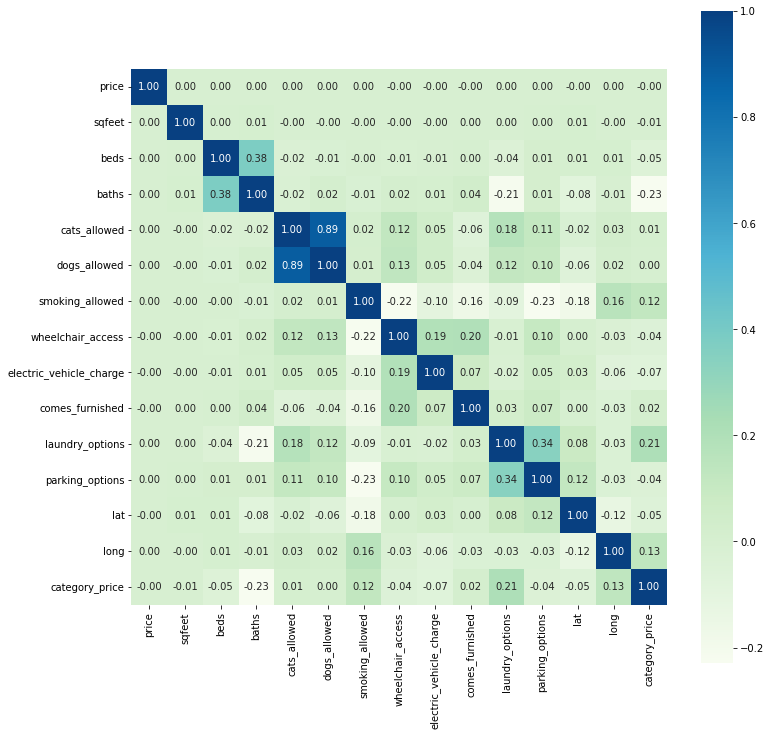

In [40]:
matrizCorrmat = df_train.corr()
f,ax = plt.subplots(figsize =(12,12))
sns.heatmap(matrizCorrmat, vmax = 1 ,square=True, annot= True,fmt= '.2f', cmap="GnBu")
plt.show()

Al ver el heatmap utilizaremos las siguientes tablas "cats_allowed","dogs_allowed","comes_furnished","laundry_options","parking_options" y guardamos en una variable denominada resultado

In [41]:
resultado =  df_test[["cats_allowed","dogs_allowed","comes_furnished","laundry_options","parking_options"]]

Utilizaremos DesicionTree para hacer una prediccion

DecisionTree

Guardamos DecisionThree en una variable

In [42]:
tree = DecisionTreeClassifier()

Utilizamos las columnas elegidas 

In [43]:
X = df_train[["cats_allowed","dogs_allowed","comes_furnished","laundry_options","parking_options"]]
y = df_train["category_price"]

Declaro las variables

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

Lo ponemos a entrenar

In [45]:
tree.fit(X, y)

DecisionTreeClassifier()

Realizamos el accuaracy score

In [46]:
y_train_pred = tree.predict(X_train)

y_test_pred = tree.predict(X_test)

print("Accuracy sobre conjunto de Train:", accuracy_score(y_train_pred,y_train))
print("Accuracy sobre conjunto de Test:", accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.6725682777634187
Accuracy sobre conjunto de Test: 0.6734185186156955


Hacemos la prediccion

In [47]:
prediccion = tree.predict(X_test)

Como podemos observar tenemos una prediccion de 67,34%

In [48]:
print(f'{tree.score(X_test,y_test):.2%}')

67.34%


Ahora con df_test

In [49]:
prediccion = tree.predict(resultado)

Guardamos en un csv

In [50]:
dfresultado = pd.DataFrame(list(prediccion), columns=['pred'])
dfresultado.to_csv("Nico-Mulet.csv", index=False, sep=',')

Ahora probamos con KNeighbors

KNeighbors

In [51]:
resultado2 =  df_test[["cats_allowed","dogs_allowed","comes_furnished","laundry_options","parking_options"]]

Realizamo las mismas operaciones anteriormente

In [52]:
knn = KNeighborsClassifier() 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
prediccion2 = knn.predict(X_test)

In [56]:
y_train_pred = tree.predict(X_train)

y_test_pred = tree.predict(X_test)

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.6725682777634187
Accuracy sobre conjunto de Test: 0.6734185186156955


In [57]:
print(f'{knn.score(X_test,y_test):.2%}')

62.76%


Como podemos observar tenemos resultados distintos con los mismos datos, de todas maneras no estan tan mal

In [ ]:
prediccion2 = knn.predict(resultado2)

Guardamos con otro csv

In [58]:
dfresultado = pd.DataFrame(list(prediccion2), columns=['pred'])
dfresultado.to_csv("Nico-Mulet(2).csv", index=False, sep=',')